In [12]:
import pandas as pd

df = pd.read_csv('owid-covid-data.csv.tex')
df.head()
df.columns
df.isnull().sum()


iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [13]:
df['date'] = pd.to_datetime(df['date'])
df = df[df['location'].isin(['Kenya', 'USA', 'India'])]
df = df.dropna(subset=['date', 'total_cases'])  # or interpolate missing values


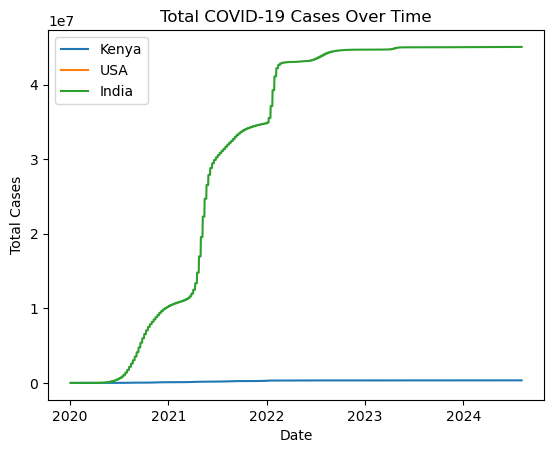

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot total cases over time
for country in ['Kenya', 'USA', 'India']:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.legend()
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.show()


<Axes: xlabel='date', ylabel='total_vaccinations'>

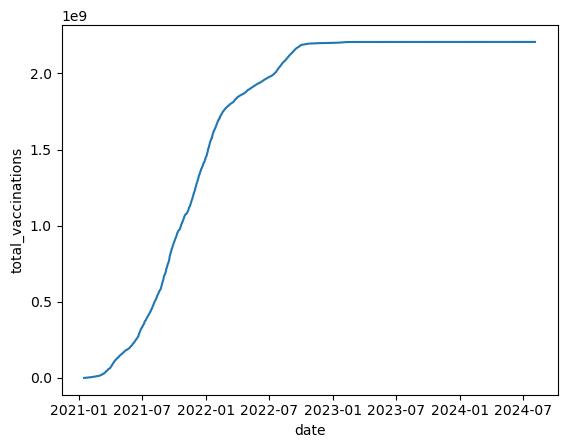

In [16]:
# Cumulative vaccinations
sns.lineplot(data=df[df['location'] == 'India'], x='date', y='total_vaccinations')


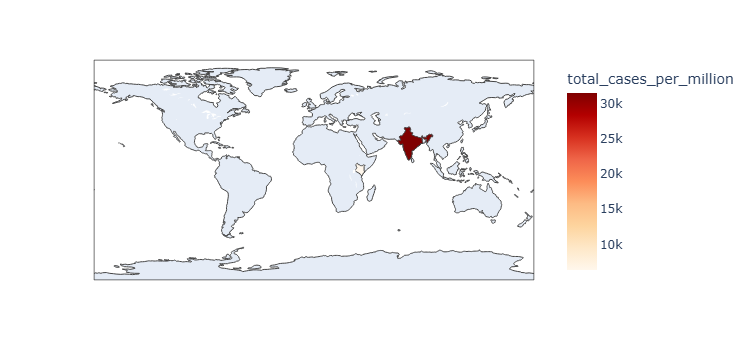

In [18]:
import plotly.express as px

latest = df[df['date'] == df['date'].max()]
fig = px.choropleth(latest,
                    locations="iso_code",
                    color="total_cases_per_million",
                    hover_name="location",
                    color_continuous_scale="OrRd")
fig.show()
